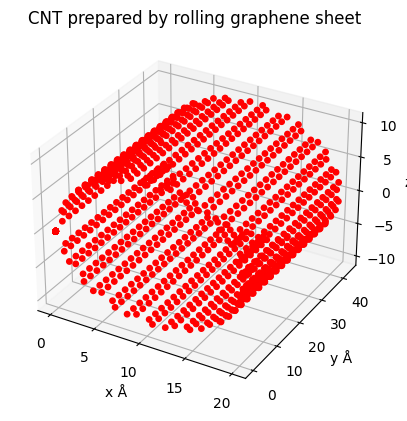

In [12]:
# Define the carbon-carbon bond length 1 Å= 10^-10m
#all dimension of length are on angstrom
import numpy as np
import math
import matplotlib.pyplot as plt
def cnt_rolled(bond_length,Length,cnt_diameter):
  cnt_radius = cnt_diameter/2
  CNT_circumference = 2*math.pi*cnt_radius 
  alpha = 0



# Calculate the number of carbon atoms along each direction
  ny = int((Length - bond_length * math.sqrt(3) / 2) / (bond_length * math.sqrt(3)))  # number of atoms in y axis
  nx = int(CNT_circumference / (3 * bond_length) * 4)  # number of atoms in x axis

# Steps for generation of the coordinates of the graphene sheets
  x_coordinates = np.zeros(nx*ny)
  y_coordinates = np.zeros(nx*ny)

  x_coordinates_row = np.zeros(nx)
  y_coordinates_row = np.zeros(nx)


  for i in range(1, nx+1):
    if i % 2 == 1:
        x_coordinates_row[i-1] = 3*(i-1)/4 * bond_length   
    else:
        x_coordinates_row[i-1] = (3*i-4)/4 * bond_length 
    
    if i % 4 == 2 or i % 4 == 3:
        y_coordinates_row[i-1] = 0
    else:
        y_coordinates_row[i-1] = np.sqrt(3)/2 * bond_length 

# Convert chirality angle from degrees to radians
  alpha = math.radians(alpha)
  sheet_length = CNT_circumference * np.cos(alpha) + Length* np.sin(alpha)
  sheet_width = Length * np.cos(alpha) + CNT_circumference * np.sin(alpha)
  chirality_adjusted_xcoordinates = np.zeros(nx*ny)
  chirality_adjusted_ycoordinates = np.zeros(nx*ny)
  # Cordinates of the carbon nanotube cylindrical surface
  cylinder_zcoordinates = np.zeros(nx*ny)
  cylinder_xcoordinates = np.zeros(nx*ny)
  cylinder_ycoordinates = np.zeros(nx*ny)

# Rotate graphene sheet to create CNT
  x_coordinates = np.zeros(nx*ny)
  y_coordinates = np.zeros(nx*ny)
  for i in range(nx):
    for j in range(ny):
        x = x_coordinates_row[i]
        y = y_coordinates_row[i] + (j-1)*np.sqrt(3)*bond_length
        Rotated_x_coordinates = x * np.cos(alpha) - y * np.sin(alpha)
        Rotated_y_coordinates = x * np.sin(alpha) + y * np.cos(alpha)
        x_coordinates[(j-1)*nx + i] = Rotated_x_coordinates
        y_coordinates[(j-1)*nx + i] = Rotated_y_coordinates
        
# Adjust chirality to generate CNT
  new_index = 0
  chirality_adjusted_xcoordinates = np.zeros(nx*ny)
  chirality_adjusted_ycoordinates = np.zeros(nx*ny)
  cylinder_xcoordinates = np.zeros(nx*ny)
  cylinder_ycoordinates = np.zeros(nx*ny)
  cylinder_zcoordinates = np.zeros(nx*ny)
  for index in range(len(x_coordinates)):
    temp_chirality_x = x_coordinates[index]
    temp_chirality_y = y_coordinates[index] - CNT_circumference*np.tan(alpha)
    if (temp_chirality_x > 0 and temp_chirality_x < CNT_circumference and temp_chirality_y > 0 and temp_chirality_y < Length):
        chirality_adjusted_xcoordinates[new_index] = temp_chirality_x
        chirality_adjusted_ycoordinates[new_index] = temp_chirality_y
        new_index += 1
        angle = temp_chirality_x/cnt_radius
        cylinder_xcoordinates[new_index] = cnt_radius * (1 - np.cos(angle))
        cylinder_ycoordinates[new_index] = temp_chirality_y
        cylinder_zcoordinates[new_index] = cnt_radius * np.sin(angle)
        
# Create a 3D scatter plot of the carbon nano tube atom positions
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter3D(cylinder_xcoordinates, cylinder_ycoordinates, cylinder_zcoordinates, c='red', s=15, alpha=1)
  ax.set_xlabel('x Å')
  ax.set_ylabel('y Å')
  ax.set_zlabel('z Å')
  ax.set_title('CNT prepared by rolling graphene sheet')
  plt.show()

  with open('CNT from graphene.xyz', 'w') as fileID:
    fileID.write(str(len(x_coordinates)) + '\n')
    fileID.write('CNT\n')
    for i in range(len(x_coordinates)):
        fileID.write('C %f %f %f\n' % (cylinder_xcoordinates[i], cylinder_ycoordinates[i], cylinder_zcoordinates[i]))

        #for connecting hexagon lattice line or bond the absolute difference betwwen bond length and distannce between atoms must be less than 10^-4 tolerance level
cnt_rolled(1.42,50,20)